In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import function file necessary for running this notebook 
</p>

In [2]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br> </span>
<span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span> 
    

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

 Index                                                    File Name
     0     coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
     1    coupling.ssp585.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc
     2    coupling.ssp585.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc
     3  coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc
     4 coupling.ssp585.bamber19.bamber19.icesheets_EAIS_globalsl.nc
     5 coupling.ssp585.bamber19.bamber19.icesheets_WAIS_globalsl.nc
     6      coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc
     7     coupling.ssp585.deconto21.deconto21.AIS_EAIS_globalsl.nc
     8     coupling.ssp585.deconto21.deconto21.AIS_WAIS_globalsl.nc
     9       coupling.ssp585.emuAIS.emulandice.AIS_EAIS_globalsl.nc
    10        coupling.ssp585.emuAIS.emulandice.AIS_PEN_globalsl.nc
    11       coupling.ssp585.emuAIS.emulandice.AIS_WAIS_globalsl.nc
    12            coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc
    13           coupling.ssp585.larmip.larmip.A

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [4]:
#
start_year=2020; end_year=2100; unit='cm'; station=0


# AIS from Emulator module.
AIS_emu_path=f'{path}/coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc'
var = 'emu'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from Larmip module.
AIS_lar_path=f'{path}/coupling.ssp585.larmip.larmip.AIS_globalsl.nc'
var = 'lar'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")


# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Bamber 19 module.
AIS_b19_path=f'{path}/coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc'
var = 'b19'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [5]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [6]:
T1=2030; T2=2050; T3=2070; T4=2100

var = 'lar'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'b19'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     sklearn KDE
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    Visualize the data like in 
    <a href=" https://doi.org/10.1029/2019JF005418"><b>Gilford20</b></a>
    Figure_4b  
</span>

<p>Approach — </p>
<ol>
    <li>Use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html">sklearn.neighbors.KernelDensity</a> to fit a 2-d kernel density estimate to the pairs of, for example, (2030, 2100) in a <code> 2D matrix</code>.</li>
    <li>Create a grid of test points. Based on the <code>max/min</code> of each column, create a meshgrid <code> grid_samples</code>.</li>
    <li>Use the <code>score_samples</code> method of the kernel density estimate to determine a weight for each test point.<br><code>log_density_values = kde.score_samples(grid_samples)</code></li>
    <li>Convert it to density <code>expo(log_density_values)</code>
    <li>Normalize the weights column wise. <i>Divide individual column value by column sum.</i></li>
    <li>Convert back to log values. </li>
    <li>Do a filled contour plot as in Gilford20.<br>
</ol>


In [7]:
VAR1='lar'; T1=2030; T2=2100;
K='gaussian'; BW=1; linspace_int=100
xaxVAR=f'{VAR1}_{T1}';   xax_VAR=eval(xaxVAR)
yaxVAR=f'{VAR1}_{T2}';   yax_VAR=eval(yaxVAR)
val = 'density_values'
#
PLOT_VAR, Xgrid, Ygrid, INdata = fn.gilford(xax_VAR, yax_VAR,K,BW,linspace_int, val)

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize  
</span>

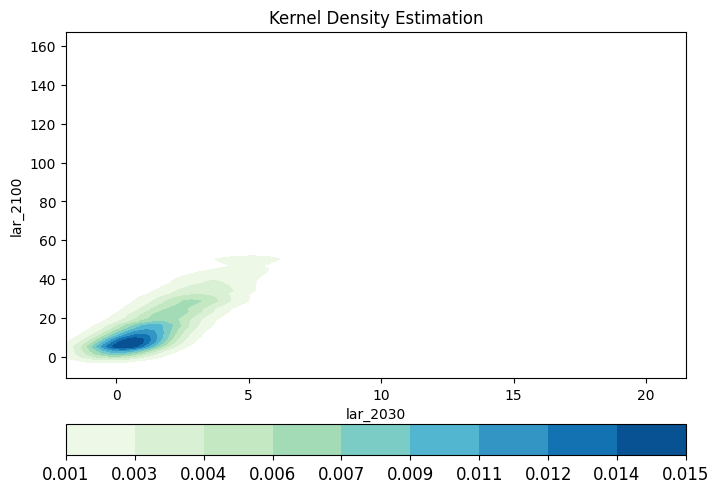

In [8]:
# visualize 1
plt.figure(figsize=(8, 6))
#
# clevels=np.linspace(PLOT_VAR.min(),PLOT_VAR.max(),10)
clevels=np.linspace(1e-3,PLOT_VAR.max(),10)
clabels=np.round(clevels,decimals=3).astype('str')
contour=plt.contourf(Xgrid, Ygrid, PLOT_VAR,levels=clevels,cmap='GnBu')
#
# plt.scatter(INdata[:, 0], INdata[:, 1], s=.5, facecolor='red')
plt.title('Kernel Density Estimation')
plt.xlabel(xaxVAR)
plt.ylabel(yaxVAR)
#
cbar=plt.colorbar(contour,ticks=clevels,orientation='horizontal',pad=0.1)
cbar.set_ticklabels(clabels)
cbar.ax.tick_params(labelsize=12)
#
plt.show()
    

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: visualize   LOG
</span>

<hr style="border: none; height: 4px; background-color: yellow; border-style: dotted;">

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Check if the column sums to 1 
</span>

In [9]:
# column_sums = density_values_Normalized.sum(axis=0)
# plt.plot(column_sums)
# plt.ylim(0, 1.1);
# # plt.title('Sum of Columns in Norm_density_values')
# # plt.show()

<hr style="border: none; height: 4px; background-color: red; border-style: dotted;">

 <p>Links — </p>
    <a href=\"https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html\">sklearn.neighbors.KernelDensity</a>
    <br>
    <a href=\"https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation\"> kernel-density-estimation</a>